<a href="https://colab.research.google.com/github/Arkya187/Projects/blob/main/Face_mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset="/content/face-mask-dataset.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
masked_files=os.listdir("/content/data/with_mask")
print("The length of Masked Images=",len(masked_files))

The length of Masked Images= 3725


In [ ]:
unmasked_files=os.listdir("/content/data/without_mask")
print("The length of Unmasked Images=",len(unmasked_files))

The length of Unmasked Images= 3828


In [ ]:
label_masks=[1]*3725
label_unmasks=[0]*3828
print(label_masks[0:6])

[1, 1, 1, 1, 1, 1]


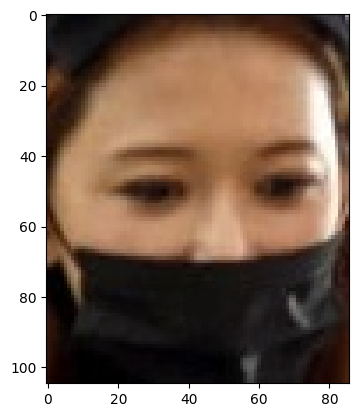

In [ ]:
image=mpimg.imread("/content/data/with_mask/with_mask_100.jpg")
plt.imshow(image)

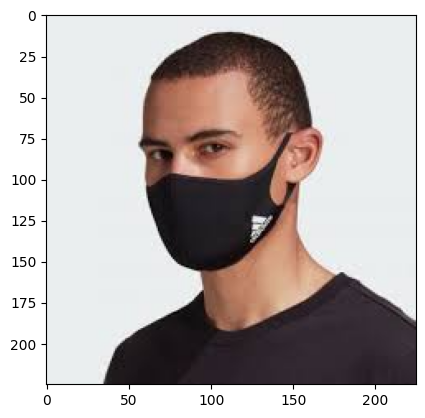

In [ ]:
image=mpimg.imread("/content/data/with_mask/with_mask_2925.jpg")
plt.imshow(image)

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
with_mask_paths="/content/data/with_mask/"
data=[]
for img_file in masked_files:
  image=Image.open(with_mask_paths+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
without_mask_paths="/content/data/without_mask/"
for img_file in unmasked_files:
  image=Image.open(without_mask_paths+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
len(data)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553

In [ ]:
print(data[0])

[[[238 236 237]
  [238 236 237]
  [238 236 237]
  ...
  [229 228 226]
  [229 228 226]
  [229 228 226]]

 [[238 236 237]
  [238 236 237]
  [238 236 237]
  ...
  [229 228 226]
  [229 228 226]
  [229 228 226]]

 [[238 236 237]
  [238 236 237]
  [238 236 237]
  ...
  [229 228 226]
  [229 228 226]
  [229 228 226]]

 ...

 [[235 234 240]
  [238 237 243]
  [223 222 228]
  ...
  [212 212 214]
  [204 204 206]
  [205 205 207]]

 [[235 234 240]
  [233 232 239]
  [224 223 229]
  ...
  [205 205 207]
  [204 204 206]
  [207 207 209]]

 [[235 234 242]
  [224 223 231]
  [219 218 225]
  ...
  [200 200 202]
  [206 206 208]
  [203 203 205]]]


In [ ]:
print(data[0].shape)

(128, 128, 3)


In [ ]:
X=np.array(data)
y=np.array(label_masks+label_unmasks)
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255
print(X_train_scaled[0])

[[[0.03921569 0.13333333 0.21960784]
  [0.04313725 0.1372549  0.22352941]
  [0.04313725 0.1372549  0.22745098]
  ...
  [0.46666667 0.45882353 0.61176471]
  [0.53333333 0.5254902  0.67058824]
  [0.56078431 0.54509804 0.69019608]]

 [[0.04313725 0.12941176 0.21960784]
  [0.04705882 0.13333333 0.22352941]
  [0.04705882 0.13333333 0.22352941]
  ...
  [0.4627451  0.44705882 0.6       ]
  [0.50196078 0.49019608 0.63921569]
  [0.53333333 0.5254902  0.66666667]]

 [[0.04705882 0.13333333 0.22352941]
  [0.04313725 0.12941176 0.21960784]
  [0.03529412 0.12156863 0.21176471]
  ...
  [0.49803922 0.48627451 0.63137255]
  [0.47058824 0.4627451  0.60784314]
  [0.51372549 0.50588235 0.65490196]]

 ...

 [[0.10196078 0.14901961 0.20392157]
  [0.09411765 0.14117647 0.19607843]
  [0.1254902  0.16470588 0.22352941]
  ...
  [0.69411765 0.67058824 0.81568627]
  [0.72941176 0.71372549 0.85098039]
  [0.74509804 0.72941176 0.87058824]]

 [[0.15686275 0.2        0.25490196]
  [0.09803922 0.1372549  0.19215686]


In [ ]:
from tensorflow import keras

In [ ]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.6964 - loss: 0.6005 - val_acc: 0.9074 - val_loss: 0.2531
Epoch 2/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.8662 - loss: 0.3206 - val_acc: 0.9025 - val_loss: 0.2426
Epoch 3/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8991 - loss: 0.2591 - val_acc: 0.9190 - val_loss: 0.2354
Epoch 4/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9189 - loss: 0.2099 - val_acc: 0.9207 - val_loss: 0.2166
Epoch 5/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.9286 - loss: 0.1912 - val_acc: 0.9140 - val_loss: 0.2364
Epoch 6/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9495 - loss: 0.1246 - val_acc: 0.9240 - val_loss: 0.2095
Epoch 7/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9522 - loss: 0.1270 - val_acc: 0.9207 - val_loss: 0.2514
Epoch 8/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9600 - loss: 0.1132 - val_acc: 0.9240 - val_loss: 0.2206
Epoch 9/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9321 - loss: 0.2553
Test Accuracy = 0.9331568479537964


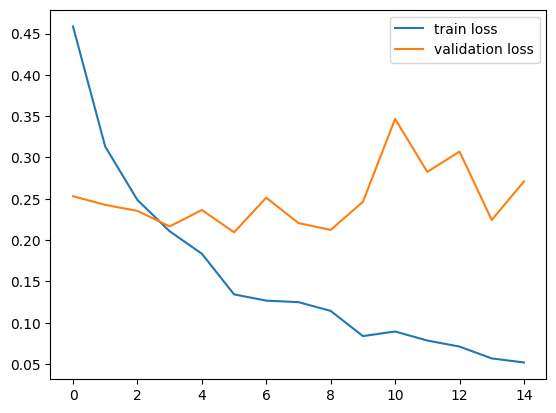

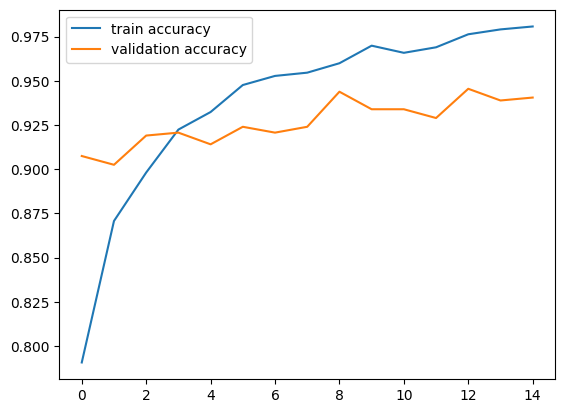

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/man-wearing-mask.jpg


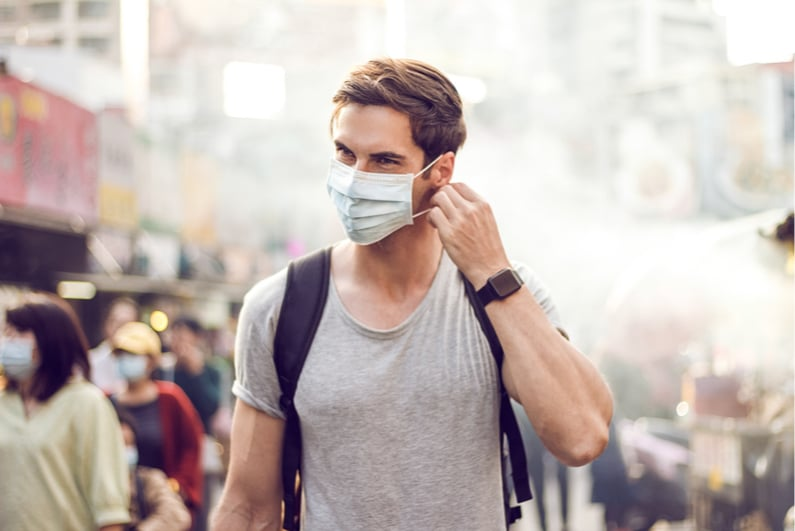

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.29751584 0.8499983 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')